<a href="https://colab.research.google.com/github/MiguelJimenezCruz/5_Regresion_Lineal/blob/main/5_Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
df1= pd.read_csv("cuentas_credicel.csv", encoding= "latin")
df1

In [276]:
#Reemplazo de datos tipo string a datos tipo numérico
df1.plazo = df1.plazo.replace({'S':''}, regex=True)

In [277]:
df1["plazo"]=df1["plazo"].astype(int)

In [ ]:
df1.info()

In [ ]:
#Filtro para obtener variables cuantitativas, tambien aqui descartamos la columna 0 porque no tiene nada
df=df1.iloc[  : ,  [0,2,6,7,8,9,10,11,12,13,16,19,20,21,25,27,28,29]]
df

In [ ]:
valores_nulos=df.isnull().sum()
valores_nulos

In [281]:
data=df.copy()

In [ ]:
df["puntos"]=df["puntos"].fillna(round(data["puntos"].median(),1))
df["porc_enganche"]=df["porc_enganche"].fillna(round(data["porc_enganche"].median(),1))

In [ ]:
valores_nulos=df.isnull().sum()
valores_nulos

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(80,5))
df.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.grid()
plt.show() #dibujamos el diagrama

In [ ]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=df
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

In [ ]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
Datos_sin_Outliers= df[(y<=Limite_Superior)&(y>=Limite_Inferior)]
Datos_sin_Outliers

In [ ]:
#Corroboramos valores nulos
valores_nulos=Datos_sin_Outliers.isnull().sum()
valores_nulos

In [ ]:
data.info()

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
df=Datos_sin_Outliers
df=df.fillna(round(Datos_sin_Outliers.mean(),1))
df

In [ ]:
#Corroboramos valores nulos
valores_nulos=df.isnull().sum()
valores_nulos

In [ ]:
df.info()

**Enganche**

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool)
#para observar el comportamiento en su dispersión
from turtle import color
sns.scatterplot(x='precio', y='enganche', color="blue", data=df)

In [37]:
Vars_Indep= df[['precio']]
Var_Dep= df['enganche']

In [38]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=df[['precio']])
y_pred


In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones', y_pred)
df

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='precio', y='enganche', color="blue", data=df)
sns.scatterplot(x='precio', y='Predicciones', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

**Precio**

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   folio             22735 non-null  int64  
 1   folio_solicitud   22735 non-null  int64  
 2   plazo             22735 non-null  int64  
 3   precio            22735 non-null  float64
 4   enganche          22735 non-null  float64
 5   descuento         22735 non-null  float64
 6   semana            22735 non-null  float64
 7   monto_financiado  22735 non-null  float64
 8   costo_total       22735 non-null  float64
 9   monto_accesorios  22735 non-null  float64
 10  status            22735 non-null  float64
 11  inversion         22735 non-null  int64  
 12  pagos_realizados  22735 non-null  float64
 13  reautorizacion    22735 non-null  float64
 14  puntos            22735 non-null  float64
 15  porc_enganche     22735 non-null  float64
 16  porc_tasa         22735 non-null  float6

<Axes: xlabel='monto_financiado', ylabel='precio'>

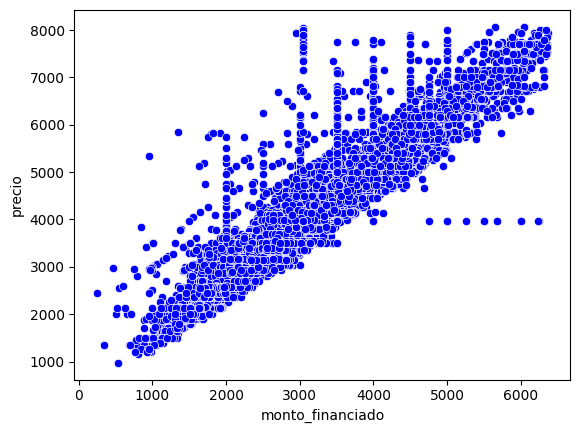

In [293]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool)
#para observar el comportamiento en su dispersión
from turtle import color
sns.scatterplot(x='monto_financiado', y='precio', color="blue", data=df)

In [292]:
Vars_Indep1= df[['monto_financiado']]
Var_Dep1= df['precio']

In [ ]:
model.fit(X=Vars_Indep1, y=Var_Dep1)

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred1= model.predict(X=df[['monto_financiado']])
y_pred1

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones1', y_pred1)
df

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='monto_financiado', y='precio', color="blue", data=df)
sns.scatterplot(x='monto_financiado', y='Predicciones1', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl1=np.sqrt(coef_Deter)
coef_Correl1

**Costo total**

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Predicciones3     22735 non-null  float64
 1   folio             22735 non-null  int64  
 2   folio_solicitud   22735 non-null  int64  
 3   plazo             22735 non-null  int64  
 4   precio            22735 non-null  float64
 5   enganche          22735 non-null  float64
 6   descuento         22735 non-null  float64
 7   semana            22735 non-null  float64
 8   monto_financiado  22735 non-null  float64
 9   costo_total       22735 non-null  float64
 10  monto_accesorios  22735 non-null  float64
 11  status            22735 non-null  float64
 12  inversion         22735 non-null  int64  
 13  pagos_realizados  22735 non-null  float64
 14  reautorizacion    22735 non-null  float64
 15  puntos            22735 non-null  float64
 16  porc_enganche     22735 non-null  float6

In [ ]:
sns.scatterplot(x='monto_financiado', y='costo_total', color="blue", data=df)

In [ ]:
Vars_Indep2= df[['monto_financiado']]
Var_Dep2= df['costo_total']
model.fit(X=Vars_Indep2, y=Var_Dep2)
model.__dict__

In [ ]:
y_pred= model.predict(X=df[['costo_total']])
df.insert(0, 'Predicciones2', y_pred)


In [ ]:
sns.scatterplot(x='monto_financiado', y='costo_total', color="blue", data=df)
sns.scatterplot(x='monto_financiado', y='Predicciones2', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2=model.score(X=Vars_Indep2, y=Var_Dep2)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

**pagos realizados**

In [ ]:
sns.scatterplot(x='monto_financiado', y='pagos_realizados', color="blue", data=df)

**Plazo**

In [ ]:
sns.scatterplot(x='monto_financiado', y='plazo', color="blue", data=df)

**Monto financiado**

In [ ]:
sns.scatterplot(x='enganche', y='monto_financiado', color="blue", data=df)

In [ ]:
Vars_Indep3= df[['enganche']]
Var_Dep3= df['monto_financiado']
model.fit(X=Vars_Indep3, y=Var_Dep3)
model.__dict__

In [302]:
y_pred= model.predict(X=df[['enganche']])
df.insert(0, 'Predicciones3', y_pred)

In [ ]:
sns.scatterplot(x='enganche', y='monto_financiado', color="blue", data=df)
sns.scatterplot(x='enganche', y='Predicciones3', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3=model.score(X=Vars_Indep3, y=Var_Dep3)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl3=np.sqrt(coef_Deter2)
coef_Correl3

**Porcentaje de enganche**

<Axes: xlabel='precio', ylabel='porc_enganche'>

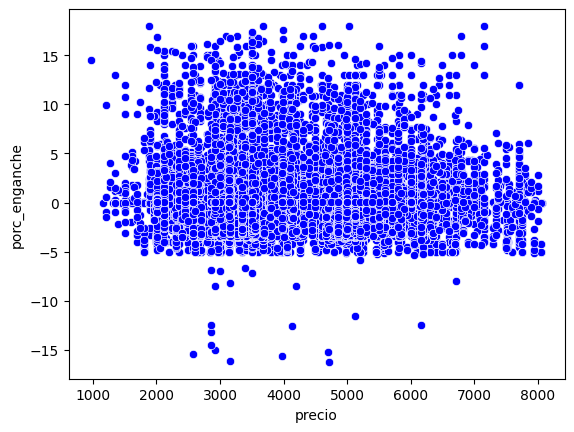

In [313]:
sns.scatterplot(x='precio', y='porc_enganche', color="blue", data=df)